In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to check these)
artists_to_load = "./data/cleaned_artists.csv"
nationalities_to_load = "./data/NationalityConversions.csv"

# Read the City and Ride Data
artists_df = pd.read_csv(artists_to_load)
nationalities_df = pd.read_csv(nationalities_to_load, encoding='ISO-8859-1')

In [2]:
artists_df.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,unknown,0.0
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,unknown,0.0
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,unknown,0.0
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,unknown,0.0


In [3]:
# What percent female in each country per 5 years
artists_df['female_count'] = np.where(artists_df['Gender'] == 'Female', 1, 0)
artists_df['total'] = 1
artists_df = artists_df.iloc[:, [3,5,9, 10]]
artists_df.head()

,Nationality,BeginDate,female_count,total
0,American,1930,0,1
1,Spanish,1936,0,1
2,American,1941,0,1
3,American,1946,0,1
4,Danish,1941,0,1


In [4]:
# Make percent_female df
percent_female = artists_df.groupby(['Nationality', 'BeginDate']).sum()
percent_female = percent_female.reset_index()
percent_female

,Nationality,BeginDate,female_count,total
0,Afghan,1973,1,1
1,Albanian,1964,0,1
2,Albanian,1969,0,1
3,Albanian,1974,0,1
4,Algerian,1922,0,1
...,...,...,...,...
3085,unknown,2009,0,3
3086,unknown,2010,0,3
3087,unknown,2011,0,2
3088,unknown,2012,0,1


In [5]:
percent_female = percent_female[percent_female.BeginDate != 0]
percent_female = percent_female[percent_female.Nationality != 'unknown']
percent_female = percent_female[percent_female.Nationality != 'Nationality unknown']
percent_female.head()

,Nationality,BeginDate,female_count,total
0,Afghan,1973,1,1
1,Albanian,1964,0,1
2,Albanian,1969,0,1
3,Albanian,1974,0,1
4,Algerian,1922,0,1


In [6]:
nationalities_df.head()

,Country,Nationality,Continent,Region
0,Afghanistan,Afghan,Asia,Southern Asia
1,Åland Islands,Ã land Island,Europe,Northern Europe
2,Albania,Albanian,Europe,Southern Europe
3,NaN,Sahrawi,Africa,Northern Africa
4,Algeria,Algerian,Africa,Northern Africa


In [7]:
continents_dict = dict(zip(nationalities_df['Nationality'], nationalities_df['Continent']))
percent_female['Continent'] = percent_female['Nationality'].map(continents_dict)
regions_dict = dict(zip(nationalities_df['Nationality'], nationalities_df['Region']))
percent_female['Region'] = percent_female['Nationality'].map(regions_dict)
percent_female.head()

,Nationality,BeginDate,female_count,total,Continent,Region
0,Afghan,1973,1,1,Asia,Southern Asia
1,Albanian,1964,0,1,Europe,Southern Europe
2,Albanian,1969,0,1,Europe,Southern Europe
3,Albanian,1974,0,1,Europe,Southern Europe
4,Algerian,1922,0,1,Africa,Northern Africa


In [8]:
def end0(x):
    x = str(x)[:-1] + '0'
    return x

In [9]:
percent_female['Decade'] = percent_female['BeginDate'].apply(end0)
percent_female['Decade'] = percent_female['Decade'].astype(int)
percent_female

,Nationality,BeginDate,female_count,total,Continent,Region,Decade
0,Afghan,1973,1,1,Asia,Southern Asia,1970
1,Albanian,1964,0,1,Europe,Southern Europe,1960
2,Albanian,1969,0,1,Europe,Southern Europe,1960
3,Albanian,1974,0,1,Europe,Southern Europe,1970
4,Algerian,1922,0,1,Africa,Northern Africa,1920
...,...,...,...,...,...,...,...
2954,Zimbabwean,1924,0,1,Africa,Eastern Africa,1920
2955,Zimbabwean,1940,0,1,Africa,Eastern Africa,1940
2956,Zimbabwean,1944,0,1,Africa,Eastern Africa,1940
2957,Zimbabwean,1981,0,1,Africa,Eastern Africa,1980


In [10]:
percent_female.isna().sum()

Nationality     0
BeginDate       0
female_count    0
total           0
Continent       0
Region          0
Decade          0
dtype: int64

In [11]:
percent_female_continent = percent_female.groupby(['Continent', 'Decade']).sum()
percent_female_continent['percent_female'] = percent_female_continent['female_count'] / percent_female_continent['total'] * 100
percent_female_continent = percent_female_continent.reset_index()
percent_female_continent = percent_female_continent.drop('BeginDate', axis=1)
percent_female_continent

,Continent,Decade,female_count,total,percent_female
0,Africa,1920,1,11,9.090909
1,Africa,1930,2,13,15.384615
2,Africa,1940,3,19,15.789474
3,Africa,1950,3,17,17.647059
4,Africa,1960,8,21,38.095238
...,...,...,...,...,...
83,Oceania,1950,1,5,20.000000
84,Oceania,1960,2,7,28.571429
85,Oceania,1970,2,7,28.571429
86,Oceania,1980,0,4,0.000000


In [12]:
output_df = "./data/percent_female_continent.csv"
percent_female_continent.to_csv(output_df, index=False)

In [13]:
percent_female_region = percent_female.groupby(['Region', 'Decade']).sum()
percent_female_region['percent_female'] = percent_female_region['female_count'] / percent_female_region['total'] * 100
percent_female_region = percent_female_region.reset_index()
percent_female_region = percent_female_region.drop('BeginDate', axis=1)
percent_female_region

,Region,Decade,female_count,total,percent_female
0,Australia and New Zealand,1880,0,2,0.00000
1,Australia and New Zealand,1900,0,4,0.00000
2,Australia and New Zealand,1910,0,6,0.00000
3,Australia and New Zealand,1920,1,4,25.00000
4,Australia and New Zealand,1930,1,10,10.00000
...,...,...,...,...,...
229,Western Europe,1970,44,148,29.72973
230,Western Europe,1980,16,41,39.02439
231,Western Europe,1990,0,9,0.00000
232,Western Europe,2000,0,7,0.00000


In [14]:
output_df = "./data/percent_female_region.csv"
percent_female_region.to_csv(output_df, index=False)

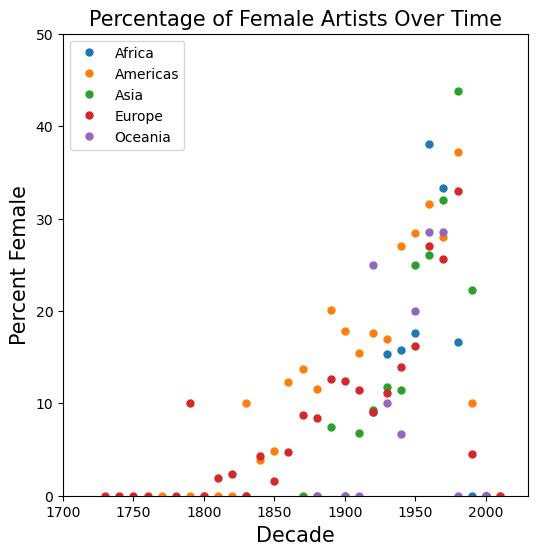

In [15]:
groups = percent_female_continent.groupby('Continent')
plt.figure(figsize=(6,6))
for name, group in groups:
    plt.plot(group.Decade, group.percent_female, marker='o', linestyle=' ',markersize=5, label=name)
# Create labels for the x and y axes.
plt.xlabel("Decade", size=15)
plt.ylabel("Percent Female", size=15)
# Set the y limit between 0 and 100.
plt.ylim(0, 50)
plt.xlim(1700, 2030)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Create a title.
plt.title("Percentage of Female Artists Over Time", size=15)
# Add the legend.
plt.legend()
plt.savefig("images/percent_female_by_continent.png")
# Show the plot.
plt.show()

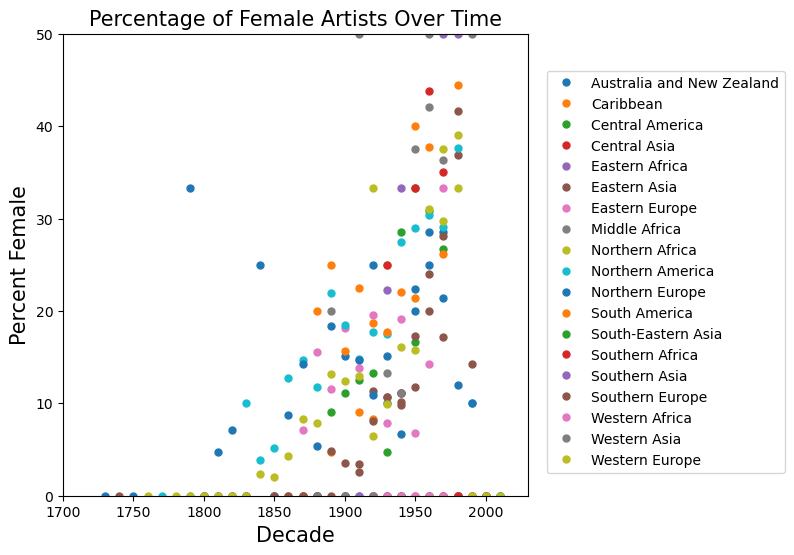

In [16]:
groups = percent_female_region.groupby('Region')
plt.figure(figsize=(6,6))
for name, group in groups:
    plt.plot(group.Decade, group.percent_female, marker='o', linestyle=' ',markersize=5, label=name)
# Create labels for the x and y axes.
plt.xlabel("Decade", size=15)
plt.ylabel("Percent Female", size=15)
# Set the y limit between 0 and 100.
plt.ylim(0, 50)
plt.xlim(1700, 2030)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Create a title.
plt.title("Percentage of Female Artists Over Time", size=15)
# Add the legend.
plt.legend(loc=(1.04,0.05))
plt.savefig("images/percent_female_by_region.png")
# Show the plot.
plt.show()

In [17]:
# Make a by_year df
by_year = artists_df.groupby(['BeginDate']).sum()
by_year = by_year.reset_index()
by_year = by_year[by_year.BeginDate != 0]
by_year

,BeginDate,female_count,total
1,1181,0,1
2,1730,0,1
3,1731,0,1
4,1746,0,1
5,1753,0,1
...,...,...,...
231,2012,0,1
232,2014,0,2
233,2015,0,1
234,2016,0,3


In [18]:
by_year['Decade'] = by_year['BeginDate'].apply(end0)
by_year['Decade'] = by_year['Decade'].astype(int)
by_decade = by_year.groupby(['Decade']).sum()
by_decade = by_decade.reset_index()
by_decade['percent_female'] = by_decade['female_count'] / by_decade['total'] * 100
by_decade = by_decade.drop('BeginDate', axis=1)
by_decade

,Decade,female_count,total,percent_female
0,1180,0,1,0.000000
1,1730,0,2,0.000000
2,1740,0,1,0.000000
3,1750,0,1,0.000000
4,1760,0,1,0.000000
5,1770,0,1,0.000000
6,1780,0,4,0.000000
7,1790,1,11,9.090909
8,1800,0,23,0.000000
9,1810,1,56,1.785714


In [19]:
output_df = "./data/by_decade.csv"
by_decade.to_csv(output_df, index=False)

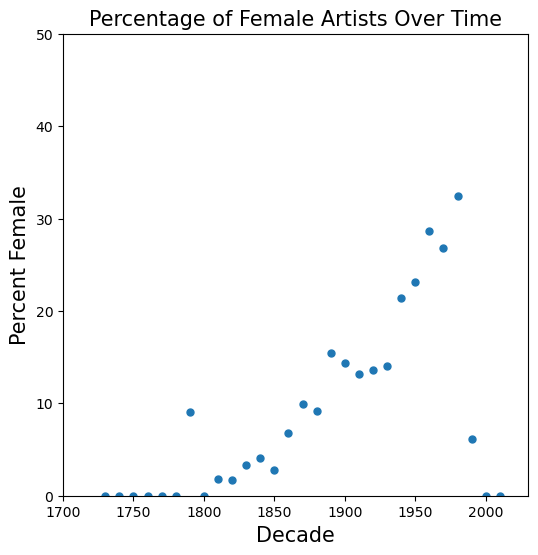

In [20]:
plt.figure(figsize=(6,6))
plt.plot(by_decade.Decade, by_decade.percent_female, marker='o', linestyle=' ',markersize=5)
# Create labels for the x and y axes.
plt.xlabel("Decade", size=15)
plt.ylabel("Percent Female", size=15)
# Set the y limit between 0 and 100.
plt.ylim(0, 50)
plt.xlim(1700, 2030)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Create a title.
plt.title("Percentage of Female Artists Over Time", size=15)
# Add the legend.
plt.savefig("images/by_decade.png")
# Show the plot.
plt.show()